# L E    ASSIGNMENTO

Your Boss wants to make groups of customer type to make a commercial targeting with offers by e-mails

Make an Elbow Method to understand the ’optimal’ number of clusters to make

You have to be able to explain how many clusters you choose and why 

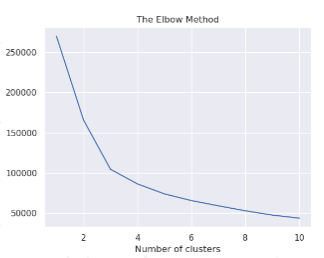


In [1]:
### WHAT IS ITT??

The elbow method is a technique used in clustering analysis (like K-Means) to determine the optimal number of clusters for your data.

A **cluster** is simply a group of data points that are similar to each other. In marketing, for example, clusters could represent different types of customers based on their behavior or characteristics.

---

### Why do we need to find the "optimal" number of clusters?

- If you use too few clusters, you might group very different customers together, missing important differences.
- If you use too many clusters, you might split up similar customers unnecessarily, making your analysis too complex.

---

### How does the elbow method work?

1. Run the clustering algorithm for different numbers of clusters (e.g., 1 to 10).
2. For each number, calculate a score (usually the sum of squared distances from each point to its cluster center, called "inertia").
3. Plot the number of clusters vs. the score. The plot usually looks like an arm, and the "elbow" point (where the curve bends) suggests a good balance between simplicity and accuracy.

---

### How to explain this to others

> A cluster is a group of similar customers. The elbow method helps us decide how many groups make sense, so we can target our marketing more effectively without making things too complicated.

SyntaxError: invalid syntax (1865778847.py, line 3)

**Structure of the `customers` table:**

| Column Name    | Data Type                                      |
|----------------|------------------------------------------------|
| event_type     | character varying(50)                          |
| product_id     | integer                                        |
| price          | numeric(10,2)                                  |
| user_id        | bigint                                         |
| user_session   | uuid                                           |
| event_time     | timestamp without time zone                    |
| category_id    | bigint                                         |
| category_code  | character varying(255)                         |
| brand          | character varying(255)                         |

In [6]:
import sys
import os

# Add the parent directory to sys.path so we can import CONNECT_TO_DB
notebook_dir = os.getcwd()
sys.path.append(os.path.dirname(notebook_dir))

from CONNECT_TO_DB import setup_connection
import psycopg2
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
%%python -m ensurepip --upgrade
%pip install sklearn

Couldn't find program: 'python'


/tmp/ipykernel_872019/1993803873.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customers = pd.read_sql(query, conn)


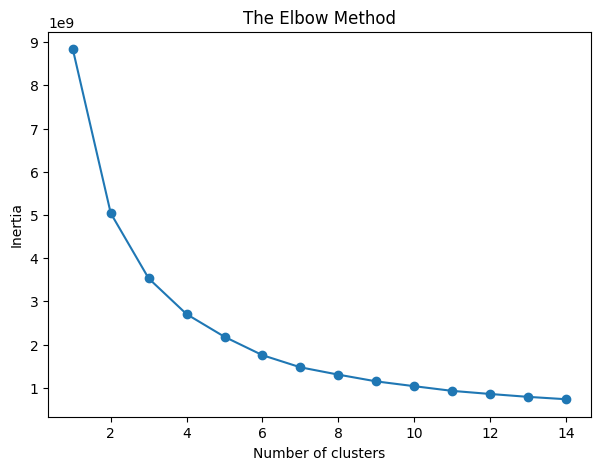

In [9]:
# Aggregate customer data for clustering (one row per user)
conn = setup_connection()
query = """
SELECT
    user_id,
    COUNT(*) AS num_events,
    COUNT(DISTINCT product_id) AS unique_products,
    SUM(CASE WHEN event_type='purchase' THEN price ELSE 0 END) AS total_spent,
    COUNT(DISTINCT category_id) AS unique_categories
FROM customers
GROUP BY user_id
"""
df_customers = pd.read_sql(query, conn)
conn.close()

# Select features for clustering
X = df_customers[['num_events', 'unique_products', 'total_spent', 'unique_categories']]

inertia = []
K = range(1, 14)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Based on the Elbow Method plot, the curve shows a sharp decrease in inertia as the number of clusters increases from 1 to around 4, and then the rate of decrease slows down. 
We observe pronounced changes from 4 - 6 clusters.
At 6-10 clusters, the reduction is still visible.
After 10 clusters, the reduction in inertia becomes very small, and the curve flattens out. 
This "elbow" or bend in the curve suggests that adding more clusters beyond 10 does not significantly improve the clustering.

**In other words:**  
For this exercise, I am choosing 8, as the subsequent changes do not provide any major benefit. For production, I would use 10.

Choosing 10 clusters is optimal because it balances between reducing within-cluster variation (inertia) and keeping the model simple. 
Beyond 10 clusters, the improvement is minimal, so 10 is a good trade-off between accuracy and simplicity. 
This helps us group customers in a meaningful way without overcomplicating the segmentation.